In [1]:
import h2o
from h2o.automl import H2OAutoML

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.202-b08, mixed mode)
  Starting server from C:\ProgramData\Anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Florin\AppData\Local\Temp\tmpsqbqu85l
  JVM stdout: C:\Users\Florin\AppData\Local\Temp\tmpsqbqu85l\h2o_Florin_started_from_python.out
  JVM stderr: C:\Users\Florin\AppData\Local\Temp\tmpsqbqu85l\h2o_Florin_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Athens
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.1
H2O_cluster_version_age:,11 months and 5 days !!!
H2O_cluster_name:,H2O_from_python_Florin_sryg6b
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.406 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [39]:
import numpy as np
from pandas import read_csv
from numpy import set_printoptions

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [79]:
filename = 'MOVIESTREAM_CHURN_RED_TRAIN.csv'
dataframe = read_csv(filename)
dataframe['YRS_CURRENT_EMPLOYER'] = dataframe['YRS_CURRENT_EMPLOYER'].fillna(0)
dataframe['IS_CHURNER'] = dataframe['IS_CHURNER'].replace(['no'], 0)
dataframe['IS_CHURNER'] = dataframe['IS_CHURNER'].replace(['yes'], 1)
array = dataframe.values
ID_train = array[:,0]
y_train = array[:,-1]
htrain = h2o.H2OFrame(dataframe)
htrain['IS_CHURNER'] = htrain['IS_CHURNER'].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [48]:
htrain.describe()

Rows:110416
Cols:19




,CUST_ID,AGE,CREDIT_BALANCE,EDUCATION,GENDER,WORK_EXPERIENCE,YRS_CURRENT_EMPLOYER,YRS_CUSTOMER,APP_MOBILE,AVG_DISC_M12,AVG_DISC_M12_14,AVG_DISC_M3_8,AVG_DISC_M6,AVG_DISC_M6_8,AVG_NTRANS_M3_11,AVG_NTRANS_M3_14,AVG_NTRANS_M3_5,AVG_NTRANS_M3_8,IS_CHURNER
type,int,int,int,int,int,int,int,int,int,real,real,real,real,real,real,real,real,real,enum
mins,1000007.0,16.0,0.0,1.0,1.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,1.44,1.83,1.0,1.33,
mean,1200506.5840820158,46.26060534705107,253.34743153166158,3.602811186784535,1.5171804810897045,14.382145703521214,4.581518982756098,5.055164106651217,60.11663164758758,0.1496493261846104,0.14641673308216155,0.15526898275612258,0.1550187472830032,0.1562864983335745,7.614809357339515,7.6397158020576885,7.246251630198538,7.5523444066077605,
maxs,1446887.0,80.0,2000.0,7.0,3.0,61.0,30.0,20.0,473.0,1.0,0.77,0.56,1.0,0.72,65.56,63.0,67.0,66.67,
sigma,127031.67418327335,17.790538656538608,263.59926593283825,1.7292507822659513,0.5185628046795051,12.997999477547705,5.906696727329785,3.9705511475840547,60.953175978701395,0.11630439825937391,0.06495002976428103,0.047241126702224884,0.11796301127898572,0.06568655891584321,8.033364539598805,7.865023921335273,7.67897497698947,7.997121491106744,
zeros,0,0,9148,0,0,8285,28851,4691,0,7236,93,2,6656,47,0,0,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1138592.0,72.0,15.0,1.0,1.0,16.0,0.0,18.0,20.0,0.43,0.19,0.11,0.1,0.07,1.89,2.0,1.67,1.83,0
1,1157523.0,80.0,182.0,2.0,2.0,16.0,0.0,1.0,18.0,0.2,0.11,0.14,0.0,0.17,2.11,2.0,2.33,2.17,0
2,1040361.0,72.0,176.0,2.0,2.0,16.0,1.0,16.0,25.0,0.0,0.11,0.17,0.07,0.06,3.0,3.0,1.33,2.0,0


In [49]:
x = htrain.columns
y = 'IS_CHURNER'
x.remove(y)
x.remove('CUST_ID')

In [50]:
aml = H2OAutoML(max_models =3,balance_classes=False,seed =1)

In [51]:
aml = H2OAutoML(max_models = 3, max_runtime_secs=300,exclude_algos=['StackedEnsemble','DeepLearning'], seed = 1)

In [52]:
aml.train(x=x, y=y, training_frame=htrain)

AutoML progress: |█
16:02:02.998: AutoML: XGBoost is not available; skipping it.
16:02:03.0: Step 'best_of_family_xgboost' not defined in provider 'StackedEnsemble': skipping it.
16:02:03.0: Step 'all_xgboost' not defined in provider 'StackedEnsemble': skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_1_AutoML_4_20220215_160202


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,67.0,67.0,211386.0,15.0,15.0,15.0,75.0,502.0,246.2388




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0011707268428872274
RMSE: 0.03421588582642904
LogLoss: 0.005077906970465326
Mean Per-Class Error: 0.011769030721722282
AUC: 0.9999148190124866
AUCPR: 0.9929546481851663
Gini: 0.9998296380249732

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2580827502534845: 


,,0,1,Error,Rate
0,0,109099.0,57.0,0.0005,(57.0/109156.0)
1,1,29.0,1231.0,0.023,(29.0/1260.0)
2,Total,109128.0,1288.0,0.0008,(86.0/110416.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.258083,0.966248,204.0
1,max f2,0.177284,0.973327,227.0
2,max f0point5,0.376692,0.967556,178.0
3,max accuracy,0.258083,0.999221,204.0
4,max precision,0.999744,1.000000,0.0
5,max recall,0.037251,1.000000,309.0
6,max specificity,0.999744,1.000000,0.0
7,max absolute_mcc,0.258083,0.965914,204.0
8,max min_per_class_accuracy,0.100521,0.996995,261.0
9,max mean_per_class_accuracy,0.093660,0.997544,264.0



Gains/Lift Table: Avg response rate:  1.14 %, avg score:  1.14 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010008,0.513077,86.600784,86.600784,0.988235,0.892726,0.988235,0.892726,0.866667,0.866667,8560.078431,8560.078431,0.866548
1,2,0.020006,0.045165,13.255889,49.944938,0.151268,0.141580,0.569941,0.517323,0.132540,0.999206,1225.588912,4894.493810,0.990503
2,3,0.030005,0.022480,0.079377,33.328101,0.000906,0.032067,0.380320,0.355620,0.000794,1.000000,-92.062342,3232.810142,0.981192
3,4,0.040003,0.014350,0.000000,24.997962,0.000000,0.017875,0.285261,0.271203,0.000000,1.000000,-100.000000,2399.796242,0.971078
4,5,0.050002,0.009639,0.000000,19.999275,0.000000,0.011866,0.228220,0.219345,0.000000,1.000000,-100.000000,1899.927549,0.960964
5,6,0.100004,0.002217,0.000000,9.999638,0.000000,0.004909,0.114110,0.112127,0.000000,1.000000,-100.000000,899.963775,0.910385
6,7,0.150005,0.000729,0.000000,6.666425,0.000000,0.001296,0.076073,0.075183,0.000000,1.000000,-100.000000,566.642516,0.859806
7,8,0.200007,0.000353,0.000000,4.999819,0.000000,0.000500,0.057055,0.056512,0.000000,1.000000,-100.000000,399.981887,0.809227
8,9,0.300002,0.000183,0.000000,3.333313,0.000000,0.000246,0.038038,0.037758,0.000000,1.000000,-100.000000,233.331321,0.708078
9,10,0.400005,0.000128,0.000000,2.499966,0.000000,0.000152,0.028528,0.028356,0.000000,1.000000,-100.000000,149.996604,0.606920




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.003935825234391799
RMSE: 0.06273615571894567
LogLoss: 0.01684601794062617
Mean Per-Class Error: 0.15738273517964968
AUC: 0.9869680941562011
AUCPR: 0.8199769826471703
Gini: 0.9739361883124023

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3149993616930247: 


,,0,1,Error,Rate
0,0,109017.0,139.0,0.0013,(139.0/109156.0)
1,1,395.0,865.0,0.3135,(395.0/1260.0)
2,Total,109412.0,1004.0,0.0048,(534.0/110416.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.314999,0.764134,170.0
1,max f2,0.095004,0.757667,255.0
2,max f0point5,0.655391,0.861794,99.0
3,max accuracy,0.554008,0.995318,116.0
4,max precision,0.999736,1.000000,0.0
5,max recall,0.000047,1.000000,399.0
6,max specificity,0.999736,1.000000,0.0
7,max absolute_mcc,0.383478,0.768807,154.0
8,max min_per_class_accuracy,0.007114,0.947488,362.0
9,max mean_per_class_accuracy,0.008703,0.947595,357.0



Gains/Lift Table: Avg response rate:  1.14 %, avg score:  1.00 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010008,2.328472e-01,71.453578,71.453578,0.815385,0.783193,0.815385,0.783193,0.715079,0.715079,7045.357753,7045.357753,0.713210
1,2,0.020006,5.042024e-02,11.985864,41.733181,0.136775,0.101380,0.476234,0.442441,0.119841,0.834921,1098.586381,4073.318100,0.824321
2,3,0.030005,2.509893e-02,4.524465,29.334019,0.051630,0.035387,0.334742,0.306797,0.045238,0.880159,352.446515,2833.401942,0.859967
3,4,0.040003,1.585626e-02,2.857557,22.716402,0.032609,0.019805,0.259226,0.235066,0.028571,0.908730,185.755694,2171.640236,0.878755
4,5,0.050002,1.084489e-02,2.222544,18.618373,0.025362,0.013055,0.212462,0.190671,0.022222,0.930952,122.254428,1761.837314,0.891119
5,6,0.100004,2.441600e-03,0.809494,9.713934,0.009237,0.005349,0.110849,0.098010,0.040476,0.971429,-19.050552,871.393381,0.881484
6,7,0.150005,8.732600e-04,0.285704,6.571191,0.003260,0.001481,0.074986,0.065834,0.014286,0.985714,-71.429606,557.119052,0.845356
7,8,0.200016,4.516300e-04,0.095217,4.951977,0.001087,0.000623,0.056509,0.049529,0.004762,0.990476,-90.478260,395.197732,0.799584
8,9,0.300002,2.260750e-04,0.031751,3.312149,0.000362,0.000311,0.037796,0.033126,0.003175,0.993651,-96.824937,231.214931,0.701656
9,10,0.400014,1.531900e-04,0.007936,2.486021,0.000091,0.000185,0.028369,0.024890,0.000794,0.994444,-99.206450,148.602105,0.601292




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.995363,0.000657,0.994928,0.995879,0.994430,0.995924,0.995653
1,auc,0.986860,0.002662,0.984250,0.986890,0.991273,0.985511,0.986376
2,err,0.004637,0.000657,0.005072,0.004121,0.005570,0.004076,0.004347
3,err_count,102.400000,14.501724,112.000000,91.000000,123.000000,90.000000,96.000000
4,f0point5,0.828109,0.040945,0.781250,0.867861,0.786802,0.847222,0.857409
5,f1,0.777590,0.020416,0.767635,0.773067,0.751515,0.802632,0.793103
6,f2,0.734191,0.026630,0.754486,0.696942,0.719258,0.762500,0.737771
7,lift_top_group,71.486500,2.725018,71.722230,70.409935,67.617120,74.942310,72.740940
8,logloss,0.016990,0.001223,0.016349,0.017447,0.018718,0.015449,0.016985
9,max_per_class_error,0.291578,0.036523,0.254032,0.345992,0.300752,0.262097,0.295019



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-02-15 16:03:34,57.360 sec,0.0,0.106213,0.062391,0.500000,0.011411,1.000000,0.988589
1,,2022-02-15 16:03:35,58.090 sec,5.0,0.072713,0.025582,0.991553,0.774780,65.109198,0.006140
2,,2022-02-15 16:03:36,58.806 sec,10.0,0.067169,0.020138,0.995436,0.832176,70.279710,0.005262
3,,2022-02-15 16:03:37,59.543 sec,15.0,0.063079,0.016850,0.996995,0.865606,72.167320,0.004972
4,,2022-02-15 16:03:37,1 min 0.263 sec,20.0,0.058516,0.014086,0.997883,0.895409,75.418815,0.004157
5,,2022-02-15 16:03:38,1 min 0.983 sec,25.0,0.055297,0.012308,0.998441,0.917970,77.639348,0.003623
6,,2022-02-15 16:03:39,1 min 1.663 sec,30.0,0.051924,0.010694,0.998913,0.938583,79.859881,0.003052
7,,2022-02-15 16:03:39,1 min 2.363 sec,35.0,0.049678,0.009704,0.999134,0.949397,80.890842,0.002726
8,,2022-02-15 16:03:40,1 min 3.043 sec,40.0,0.047034,0.008709,0.999392,0.961519,82.794156,0.002391
9,,2022-02-15 16:03:41,1 min 3.723 sec,45.0,0.044555,0.007871,0.999572,0.970661,83.904423,0.002056



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,YRS_CUSTOMER,292.214935,1.000000,0.259789
1,WORK_EXPERIENCE,157.872391,0.540261,0.140354
2,AGE,141.018494,0.482585,0.125370
3,YRS_CURRENT_EMPLOYER,92.023849,0.314918,0.081812
4,AVG_NTRANS_M3_11,90.188904,0.308639,0.080181
5,EDUCATION,55.982685,0.191581,0.049771
6,APP_MOBILE,55.220737,0.188973,0.049093
7,GENDER,47.984165,0.164208,0.042660
8,CREDIT_BALANCE,47.395138,0.162193,0.042136
9,AVG_NTRANS_M3_14,36.538788,0.125041,0.032484


In [53]:
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_4_20220215_160202,0.986968,0.016846,0.819977,0.157383,0.0627362,0.00393583
DRF_1_AutoML_4_20220215_160202,0.9851,0.02095,0.829985,0.139562,0.063452,0.00402616
GLM_1_AutoML_4_20220215_160202,0.933466,0.0369896,0.432692,0.32439,0.0901143,0.00812059


In [54]:
aml.leader.params.keys()

dict_keys(['model_id', 'training_frame', 'validation_frame', 'nfolds', 'keep_cross_validation_models', 'keep_cross_validation_predictions', 'keep_cross_validation_fold_assignment', 'score_each_iteration', 'score_tree_interval', 'fold_assignment', 'fold_column', 'response_column', 'ignored_columns', 'ignore_const_cols', 'offset_column', 'weights_column', 'balance_classes', 'class_sampling_factors', 'max_after_balance_size', 'max_confusion_matrix_size', 'ntrees', 'max_depth', 'min_rows', 'nbins', 'nbins_top_level', 'nbins_cats', 'r2_stopping', 'stopping_rounds', 'stopping_metric', 'stopping_tolerance', 'max_runtime_secs', 'seed', 'build_tree_one_node', 'learn_rate', 'learn_rate_annealing', 'distribution', 'quantile_alpha', 'tweedie_power', 'huber_alpha', 'checkpoint', 'sample_rate', 'sample_rate_per_class', 'col_sample_rate', 'col_sample_rate_change_per_level', 'col_sample_rate_per_tree', 'min_split_improvement', 'histogram_type', 'max_abs_leafnode_pred', 'pred_noise_bandwidth', 'categor

In [55]:
m = h2o.get_model(aml.leader)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_1_AutoML_4_20220215_160202


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,67.0,67.0,211386.0,15.0,15.0,15.0,75.0,502.0,246.2388




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0011707268428872274
RMSE: 0.03421588582642904
LogLoss: 0.005077906970465326
Mean Per-Class Error: 0.011769030721722282
AUC: 0.9999148190124866
AUCPR: 0.9929546481851663
Gini: 0.9998296380249732

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2580827502534845: 


,,0,1,Error,Rate
0,0,109099.0,57.0,0.0005,(57.0/109156.0)
1,1,29.0,1231.0,0.023,(29.0/1260.0)
2,Total,109128.0,1288.0,0.0008,(86.0/110416.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.258083,0.966248,204.0
1,max f2,0.177284,0.973327,227.0
2,max f0point5,0.376692,0.967556,178.0
3,max accuracy,0.258083,0.999221,204.0
4,max precision,0.999744,1.000000,0.0
5,max recall,0.037251,1.000000,309.0
6,max specificity,0.999744,1.000000,0.0
7,max absolute_mcc,0.258083,0.965914,204.0
8,max min_per_class_accuracy,0.100521,0.996995,261.0
9,max mean_per_class_accuracy,0.093660,0.997544,264.0



Gains/Lift Table: Avg response rate:  1.14 %, avg score:  1.14 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010008,0.513077,86.600784,86.600784,0.988235,0.892726,0.988235,0.892726,0.866667,0.866667,8560.078431,8560.078431,0.866548
1,2,0.020006,0.045165,13.255889,49.944938,0.151268,0.141580,0.569941,0.517323,0.132540,0.999206,1225.588912,4894.493810,0.990503
2,3,0.030005,0.022480,0.079377,33.328101,0.000906,0.032067,0.380320,0.355620,0.000794,1.000000,-92.062342,3232.810142,0.981192
3,4,0.040003,0.014350,0.000000,24.997962,0.000000,0.017875,0.285261,0.271203,0.000000,1.000000,-100.000000,2399.796242,0.971078
4,5,0.050002,0.009639,0.000000,19.999275,0.000000,0.011866,0.228220,0.219345,0.000000,1.000000,-100.000000,1899.927549,0.960964
5,6,0.100004,0.002217,0.000000,9.999638,0.000000,0.004909,0.114110,0.112127,0.000000,1.000000,-100.000000,899.963775,0.910385
6,7,0.150005,0.000729,0.000000,6.666425,0.000000,0.001296,0.076073,0.075183,0.000000,1.000000,-100.000000,566.642516,0.859806
7,8,0.200007,0.000353,0.000000,4.999819,0.000000,0.000500,0.057055,0.056512,0.000000,1.000000,-100.000000,399.981887,0.809227
8,9,0.300002,0.000183,0.000000,3.333313,0.000000,0.000246,0.038038,0.037758,0.000000,1.000000,-100.000000,233.331321,0.708078
9,10,0.400005,0.000128,0.000000,2.499966,0.000000,0.000152,0.028528,0.028356,0.000000,1.000000,-100.000000,149.996604,0.606920




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.003935825234391799
RMSE: 0.06273615571894567
LogLoss: 0.01684601794062617
Mean Per-Class Error: 0.15738273517964968
AUC: 0.9869680941562011
AUCPR: 0.8199769826471703
Gini: 0.9739361883124023

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3149993616930247: 


,,0,1,Error,Rate
0,0,109017.0,139.0,0.0013,(139.0/109156.0)
1,1,395.0,865.0,0.3135,(395.0/1260.0)
2,Total,109412.0,1004.0,0.0048,(534.0/110416.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.314999,0.764134,170.0
1,max f2,0.095004,0.757667,255.0
2,max f0point5,0.655391,0.861794,99.0
3,max accuracy,0.554008,0.995318,116.0
4,max precision,0.999736,1.000000,0.0
5,max recall,0.000047,1.000000,399.0
6,max specificity,0.999736,1.000000,0.0
7,max absolute_mcc,0.383478,0.768807,154.0
8,max min_per_class_accuracy,0.007114,0.947488,362.0
9,max mean_per_class_accuracy,0.008703,0.947595,357.0



Gains/Lift Table: Avg response rate:  1.14 %, avg score:  1.00 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010008,2.328472e-01,71.453578,71.453578,0.815385,0.783193,0.815385,0.783193,0.715079,0.715079,7045.357753,7045.357753,0.713210
1,2,0.020006,5.042024e-02,11.985864,41.733181,0.136775,0.101380,0.476234,0.442441,0.119841,0.834921,1098.586381,4073.318100,0.824321
2,3,0.030005,2.509893e-02,4.524465,29.334019,0.051630,0.035387,0.334742,0.306797,0.045238,0.880159,352.446515,2833.401942,0.859967
3,4,0.040003,1.585626e-02,2.857557,22.716402,0.032609,0.019805,0.259226,0.235066,0.028571,0.908730,185.755694,2171.640236,0.878755
4,5,0.050002,1.084489e-02,2.222544,18.618373,0.025362,0.013055,0.212462,0.190671,0.022222,0.930952,122.254428,1761.837314,0.891119
5,6,0.100004,2.441600e-03,0.809494,9.713934,0.009237,0.005349,0.110849,0.098010,0.040476,0.971429,-19.050552,871.393381,0.881484
6,7,0.150005,8.732600e-04,0.285704,6.571191,0.003260,0.001481,0.074986,0.065834,0.014286,0.985714,-71.429606,557.119052,0.845356
7,8,0.200016,4.516300e-04,0.095217,4.951977,0.001087,0.000623,0.056509,0.049529,0.004762,0.990476,-90.478260,395.197732,0.799584
8,9,0.300002,2.260750e-04,0.031751,3.312149,0.000362,0.000311,0.037796,0.033126,0.003175,0.993651,-96.824937,231.214931,0.701656
9,10,0.400014,1.531900e-04,0.007936,2.486021,0.000091,0.000185,0.028369,0.024890,0.000794,0.994444,-99.206450,148.602105,0.601292




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.995363,0.000657,0.994928,0.995879,0.994430,0.995924,0.995653
1,auc,0.986860,0.002662,0.984250,0.986890,0.991273,0.985511,0.986376
2,err,0.004637,0.000657,0.005072,0.004121,0.005570,0.004076,0.004347
3,err_count,102.400000,14.501724,112.000000,91.000000,123.000000,90.000000,96.000000
4,f0point5,0.828109,0.040945,0.781250,0.867861,0.786802,0.847222,0.857409
5,f1,0.777590,0.020416,0.767635,0.773067,0.751515,0.802632,0.793103
6,f2,0.734191,0.026630,0.754486,0.696942,0.719258,0.762500,0.737771
7,lift_top_group,71.486500,2.725018,71.722230,70.409935,67.617120,74.942310,72.740940
8,logloss,0.016990,0.001223,0.016349,0.017447,0.018718,0.015449,0.016985
9,max_per_class_error,0.291578,0.036523,0.254032,0.345992,0.300752,0.262097,0.295019



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-02-15 16:03:34,57.360 sec,0.0,0.106213,0.062391,0.500000,0.011411,1.000000,0.988589
1,,2022-02-15 16:03:35,58.090 sec,5.0,0.072713,0.025582,0.991553,0.774780,65.109198,0.006140
2,,2022-02-15 16:03:36,58.806 sec,10.0,0.067169,0.020138,0.995436,0.832176,70.279710,0.005262
3,,2022-02-15 16:03:37,59.543 sec,15.0,0.063079,0.016850,0.996995,0.865606,72.167320,0.004972
4,,2022-02-15 16:03:37,1 min 0.263 sec,20.0,0.058516,0.014086,0.997883,0.895409,75.418815,0.004157
5,,2022-02-15 16:03:38,1 min 0.983 sec,25.0,0.055297,0.012308,0.998441,0.917970,77.639348,0.003623
6,,2022-02-15 16:03:39,1 min 1.663 sec,30.0,0.051924,0.010694,0.998913,0.938583,79.859881,0.003052
7,,2022-02-15 16:03:39,1 min 2.363 sec,35.0,0.049678,0.009704,0.999134,0.949397,80.890842,0.002726
8,,2022-02-15 16:03:40,1 min 3.043 sec,40.0,0.047034,0.008709,0.999392,0.961519,82.794156,0.002391
9,,2022-02-15 16:03:41,1 min 3.723 sec,45.0,0.044555,0.007871,0.999572,0.970661,83.904423,0.002056



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,YRS_CUSTOMER,292.214935,1.000000,0.259789
1,WORK_EXPERIENCE,157.872391,0.540261,0.140354
2,AGE,141.018494,0.482585,0.125370
3,YRS_CURRENT_EMPLOYER,92.023849,0.314918,0.081812
4,AVG_NTRANS_M3_11,90.188904,0.308639,0.080181
5,EDUCATION,55.982685,0.191581,0.049771
6,APP_MOBILE,55.220737,0.188973,0.049093
7,GENDER,47.984165,0.164208,0.042660
8,CREDIT_BALANCE,47.395138,0.162193,0.042136
9,AVG_NTRANS_M3_14,36.538788,0.125041,0.032484


Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_1_AutoML_4_20220215_160202


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,67.0,67.0,211386.0,15.0,15.0,15.0,75.0,502.0,246.2388




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0011707268428872274
RMSE: 0.03421588582642904
LogLoss: 0.005077906970465326
Mean Per-Class Error: 0.011769030721722282
AUC: 0.9999148190124866
AUCPR: 0.9929546481851663
Gini: 0.9998296380249732

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2580827502534845: 


,,0,1,Error,Rate
0,0,109099.0,57.0,0.0005,(57.0/109156.0)
1,1,29.0,1231.0,0.023,(29.0/1260.0)
2,Total,109128.0,1288.0,0.0008,(86.0/110416.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.258083,0.966248,204.0
1,max f2,0.177284,0.973327,227.0
2,max f0point5,0.376692,0.967556,178.0
3,max accuracy,0.258083,0.999221,204.0
4,max precision,0.999744,1.000000,0.0
5,max recall,0.037251,1.000000,309.0
6,max specificity,0.999744,1.000000,0.0
7,max absolute_mcc,0.258083,0.965914,204.0
8,max min_per_class_accuracy,0.100521,0.996995,261.0
9,max mean_per_class_accuracy,0.093660,0.997544,264.0



Gains/Lift Table: Avg response rate:  1.14 %, avg score:  1.14 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010008,0.513077,86.600784,86.600784,0.988235,0.892726,0.988235,0.892726,0.866667,0.866667,8560.078431,8560.078431,0.866548
1,2,0.020006,0.045165,13.255889,49.944938,0.151268,0.141580,0.569941,0.517323,0.132540,0.999206,1225.588912,4894.493810,0.990503
2,3,0.030005,0.022480,0.079377,33.328101,0.000906,0.032067,0.380320,0.355620,0.000794,1.000000,-92.062342,3232.810142,0.981192
3,4,0.040003,0.014350,0.000000,24.997962,0.000000,0.017875,0.285261,0.271203,0.000000,1.000000,-100.000000,2399.796242,0.971078
4,5,0.050002,0.009639,0.000000,19.999275,0.000000,0.011866,0.228220,0.219345,0.000000,1.000000,-100.000000,1899.927549,0.960964
5,6,0.100004,0.002217,0.000000,9.999638,0.000000,0.004909,0.114110,0.112127,0.000000,1.000000,-100.000000,899.963775,0.910385
6,7,0.150005,0.000729,0.000000,6.666425,0.000000,0.001296,0.076073,0.075183,0.000000,1.000000,-100.000000,566.642516,0.859806
7,8,0.200007,0.000353,0.000000,4.999819,0.000000,0.000500,0.057055,0.056512,0.000000,1.000000,-100.000000,399.981887,0.809227
8,9,0.300002,0.000183,0.000000,3.333313,0.000000,0.000246,0.038038,0.037758,0.000000,1.000000,-100.000000,233.331321,0.708078
9,10,0.400005,0.000128,0.000000,2.499966,0.000000,0.000152,0.028528,0.028356,0.000000,1.000000,-100.000000,149.996604,0.606920




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.003935825234391799
RMSE: 0.06273615571894567
LogLoss: 0.01684601794062617
Mean Per-Class Error: 0.15738273517964968
AUC: 0.9869680941562011
AUCPR: 0.8199769826471703
Gini: 0.9739361883124023

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3149993616930247: 


,,0,1,Error,Rate
0,0,109017.0,139.0,0.0013,(139.0/109156.0)
1,1,395.0,865.0,0.3135,(395.0/1260.0)
2,Total,109412.0,1004.0,0.0048,(534.0/110416.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.314999,0.764134,170.0
1,max f2,0.095004,0.757667,255.0
2,max f0point5,0.655391,0.861794,99.0
3,max accuracy,0.554008,0.995318,116.0
4,max precision,0.999736,1.000000,0.0
5,max recall,0.000047,1.000000,399.0
6,max specificity,0.999736,1.000000,0.0
7,max absolute_mcc,0.383478,0.768807,154.0
8,max min_per_class_accuracy,0.007114,0.947488,362.0
9,max mean_per_class_accuracy,0.008703,0.947595,357.0



Gains/Lift Table: Avg response rate:  1.14 %, avg score:  1.00 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010008,2.328472e-01,71.453578,71.453578,0.815385,0.783193,0.815385,0.783193,0.715079,0.715079,7045.357753,7045.357753,0.713210
1,2,0.020006,5.042024e-02,11.985864,41.733181,0.136775,0.101380,0.476234,0.442441,0.119841,0.834921,1098.586381,4073.318100,0.824321
2,3,0.030005,2.509893e-02,4.524465,29.334019,0.051630,0.035387,0.334742,0.306797,0.045238,0.880159,352.446515,2833.401942,0.859967
3,4,0.040003,1.585626e-02,2.857557,22.716402,0.032609,0.019805,0.259226,0.235066,0.028571,0.908730,185.755694,2171.640236,0.878755
4,5,0.050002,1.084489e-02,2.222544,18.618373,0.025362,0.013055,0.212462,0.190671,0.022222,0.930952,122.254428,1761.837314,0.891119
5,6,0.100004,2.441600e-03,0.809494,9.713934,0.009237,0.005349,0.110849,0.098010,0.040476,0.971429,-19.050552,871.393381,0.881484
6,7,0.150005,8.732600e-04,0.285704,6.571191,0.003260,0.001481,0.074986,0.065834,0.014286,0.985714,-71.429606,557.119052,0.845356
7,8,0.200016,4.516300e-04,0.095217,4.951977,0.001087,0.000623,0.056509,0.049529,0.004762,0.990476,-90.478260,395.197732,0.799584
8,9,0.300002,2.260750e-04,0.031751,3.312149,0.000362,0.000311,0.037796,0.033126,0.003175,0.993651,-96.824937,231.214931,0.701656
9,10,0.400014,1.531900e-04,0.007936,2.486021,0.000091,0.000185,0.028369,0.024890,0.000794,0.994444,-99.206450,148.602105,0.601292




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.995363,0.000657,0.994928,0.995879,0.994430,0.995924,0.995653
1,auc,0.986860,0.002662,0.984250,0.986890,0.991273,0.985511,0.986376
2,err,0.004637,0.000657,0.005072,0.004121,0.005570,0.004076,0.004347
3,err_count,102.400000,14.501724,112.000000,91.000000,123.000000,90.000000,96.000000
4,f0point5,0.828109,0.040945,0.781250,0.867861,0.786802,0.847222,0.857409
5,f1,0.777590,0.020416,0.767635,0.773067,0.751515,0.802632,0.793103
6,f2,0.734191,0.026630,0.754486,0.696942,0.719258,0.762500,0.737771
7,lift_top_group,71.486500,2.725018,71.722230,70.409935,67.617120,74.942310,72.740940
8,logloss,0.016990,0.001223,0.016349,0.017447,0.018718,0.015449,0.016985
9,max_per_class_error,0.291578,0.036523,0.254032,0.345992,0.300752,0.262097,0.295019



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-02-15 16:03:34,57.360 sec,0.0,0.106213,0.062391,0.500000,0.011411,1.000000,0.988589
1,,2022-02-15 16:03:35,58.090 sec,5.0,0.072713,0.025582,0.991553,0.774780,65.109198,0.006140
2,,2022-02-15 16:03:36,58.806 sec,10.0,0.067169,0.020138,0.995436,0.832176,70.279710,0.005262
3,,2022-02-15 16:03:37,59.543 sec,15.0,0.063079,0.016850,0.996995,0.865606,72.167320,0.004972
4,,2022-02-15 16:03:37,1 min 0.263 sec,20.0,0.058516,0.014086,0.997883,0.895409,75.418815,0.004157
5,,2022-02-15 16:03:38,1 min 0.983 sec,25.0,0.055297,0.012308,0.998441,0.917970,77.639348,0.003623
6,,2022-02-15 16:03:39,1 min 1.663 sec,30.0,0.051924,0.010694,0.998913,0.938583,79.859881,0.003052
7,,2022-02-15 16:03:39,1 min 2.363 sec,35.0,0.049678,0.009704,0.999134,0.949397,80.890842,0.002726
8,,2022-02-15 16:03:40,1 min 3.043 sec,40.0,0.047034,0.008709,0.999392,0.961519,82.794156,0.002391
9,,2022-02-15 16:03:41,1 min 3.723 sec,45.0,0.044555,0.007871,0.999572,0.970661,83.904423,0.002056



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,YRS_CUSTOMER,292.214935,1.000000,0.259789
1,WORK_EXPERIENCE,157.872391,0.540261,0.140354
2,AGE,141.018494,0.482585,0.125370
3,YRS_CURRENT_EMPLOYER,92.023849,0.314918,0.081812
4,AVG_NTRANS_M3_11,90.188904,0.308639,0.080181
5,EDUCATION,55.982685,0.191581,0.049771
6,APP_MOBILE,55.220737,0.188973,0.049093
7,GENDER,47.984165,0.164208,0.042660
8,CREDIT_BALANCE,47.395138,0.162193,0.042136
9,AVG_NTRANS_M3_14,36.538788,0.125041,0.032484


H2OTypeError: Argument `model_id` should be a string, got H2OGradientBoostingEstimator 

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_1_AutoML_4_20220215_160202


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,67.0,67.0,211386.0,15.0,15.0,15.0,75.0,502.0,246.2388




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0011707268428872274
RMSE: 0.03421588582642904
LogLoss: 0.005077906970465326
Mean Per-Class Error: 0.011769030721722282
AUC: 0.9999148190124866
AUCPR: 0.9929546481851663
Gini: 0.9998296380249732

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2580827502534845: 


,,0,1,Error,Rate
0,0,109099.0,57.0,0.0005,(57.0/109156.0)
1,1,29.0,1231.0,0.023,(29.0/1260.0)
2,Total,109128.0,1288.0,0.0008,(86.0/110416.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.258083,0.966248,204.0
1,max f2,0.177284,0.973327,227.0
2,max f0point5,0.376692,0.967556,178.0
3,max accuracy,0.258083,0.999221,204.0
4,max precision,0.999744,1.000000,0.0
5,max recall,0.037251,1.000000,309.0
6,max specificity,0.999744,1.000000,0.0
7,max absolute_mcc,0.258083,0.965914,204.0
8,max min_per_class_accuracy,0.100521,0.996995,261.0
9,max mean_per_class_accuracy,0.093660,0.997544,264.0



Gains/Lift Table: Avg response rate:  1.14 %, avg score:  1.14 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010008,0.513077,86.600784,86.600784,0.988235,0.892726,0.988235,0.892726,0.866667,0.866667,8560.078431,8560.078431,0.866548
1,2,0.020006,0.045165,13.255889,49.944938,0.151268,0.141580,0.569941,0.517323,0.132540,0.999206,1225.588912,4894.493810,0.990503
2,3,0.030005,0.022480,0.079377,33.328101,0.000906,0.032067,0.380320,0.355620,0.000794,1.000000,-92.062342,3232.810142,0.981192
3,4,0.040003,0.014350,0.000000,24.997962,0.000000,0.017875,0.285261,0.271203,0.000000,1.000000,-100.000000,2399.796242,0.971078
4,5,0.050002,0.009639,0.000000,19.999275,0.000000,0.011866,0.228220,0.219345,0.000000,1.000000,-100.000000,1899.927549,0.960964
5,6,0.100004,0.002217,0.000000,9.999638,0.000000,0.004909,0.114110,0.112127,0.000000,1.000000,-100.000000,899.963775,0.910385
6,7,0.150005,0.000729,0.000000,6.666425,0.000000,0.001296,0.076073,0.075183,0.000000,1.000000,-100.000000,566.642516,0.859806
7,8,0.200007,0.000353,0.000000,4.999819,0.000000,0.000500,0.057055,0.056512,0.000000,1.000000,-100.000000,399.981887,0.809227
8,9,0.300002,0.000183,0.000000,3.333313,0.000000,0.000246,0.038038,0.037758,0.000000,1.000000,-100.000000,233.331321,0.708078
9,10,0.400005,0.000128,0.000000,2.499966,0.000000,0.000152,0.028528,0.028356,0.000000,1.000000,-100.000000,149.996604,0.606920




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.003935825234391799
RMSE: 0.06273615571894567
LogLoss: 0.01684601794062617
Mean Per-Class Error: 0.15738273517964968
AUC: 0.9869680941562011
AUCPR: 0.8199769826471703
Gini: 0.9739361883124023

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3149993616930247: 


,,0,1,Error,Rate
0,0,109017.0,139.0,0.0013,(139.0/109156.0)
1,1,395.0,865.0,0.3135,(395.0/1260.0)
2,Total,109412.0,1004.0,0.0048,(534.0/110416.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.314999,0.764134,170.0
1,max f2,0.095004,0.757667,255.0
2,max f0point5,0.655391,0.861794,99.0
3,max accuracy,0.554008,0.995318,116.0
4,max precision,0.999736,1.000000,0.0
5,max recall,0.000047,1.000000,399.0
6,max specificity,0.999736,1.000000,0.0
7,max absolute_mcc,0.383478,0.768807,154.0
8,max min_per_class_accuracy,0.007114,0.947488,362.0
9,max mean_per_class_accuracy,0.008703,0.947595,357.0



Gains/Lift Table: Avg response rate:  1.14 %, avg score:  1.00 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010008,2.328472e-01,71.453578,71.453578,0.815385,0.783193,0.815385,0.783193,0.715079,0.715079,7045.357753,7045.357753,0.713210
1,2,0.020006,5.042024e-02,11.985864,41.733181,0.136775,0.101380,0.476234,0.442441,0.119841,0.834921,1098.586381,4073.318100,0.824321
2,3,0.030005,2.509893e-02,4.524465,29.334019,0.051630,0.035387,0.334742,0.306797,0.045238,0.880159,352.446515,2833.401942,0.859967
3,4,0.040003,1.585626e-02,2.857557,22.716402,0.032609,0.019805,0.259226,0.235066,0.028571,0.908730,185.755694,2171.640236,0.878755
4,5,0.050002,1.084489e-02,2.222544,18.618373,0.025362,0.013055,0.212462,0.190671,0.022222,0.930952,122.254428,1761.837314,0.891119
5,6,0.100004,2.441600e-03,0.809494,9.713934,0.009237,0.005349,0.110849,0.098010,0.040476,0.971429,-19.050552,871.393381,0.881484
6,7,0.150005,8.732600e-04,0.285704,6.571191,0.003260,0.001481,0.074986,0.065834,0.014286,0.985714,-71.429606,557.119052,0.845356
7,8,0.200016,4.516300e-04,0.095217,4.951977,0.001087,0.000623,0.056509,0.049529,0.004762,0.990476,-90.478260,395.197732,0.799584
8,9,0.300002,2.260750e-04,0.031751,3.312149,0.000362,0.000311,0.037796,0.033126,0.003175,0.993651,-96.824937,231.214931,0.701656
9,10,0.400014,1.531900e-04,0.007936,2.486021,0.000091,0.000185,0.028369,0.024890,0.000794,0.994444,-99.206450,148.602105,0.601292




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.995363,0.000657,0.994928,0.995879,0.994430,0.995924,0.995653
1,auc,0.986860,0.002662,0.984250,0.986890,0.991273,0.985511,0.986376
2,err,0.004637,0.000657,0.005072,0.004121,0.005570,0.004076,0.004347
3,err_count,102.400000,14.501724,112.000000,91.000000,123.000000,90.000000,96.000000
4,f0point5,0.828109,0.040945,0.781250,0.867861,0.786802,0.847222,0.857409
5,f1,0.777590,0.020416,0.767635,0.773067,0.751515,0.802632,0.793103
6,f2,0.734191,0.026630,0.754486,0.696942,0.719258,0.762500,0.737771
7,lift_top_group,71.486500,2.725018,71.722230,70.409935,67.617120,74.942310,72.740940
8,logloss,0.016990,0.001223,0.016349,0.017447,0.018718,0.015449,0.016985
9,max_per_class_error,0.291578,0.036523,0.254032,0.345992,0.300752,0.262097,0.295019



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-02-15 16:03:34,57.360 sec,0.0,0.106213,0.062391,0.500000,0.011411,1.000000,0.988589
1,,2022-02-15 16:03:35,58.090 sec,5.0,0.072713,0.025582,0.991553,0.774780,65.109198,0.006140
2,,2022-02-15 16:03:36,58.806 sec,10.0,0.067169,0.020138,0.995436,0.832176,70.279710,0.005262
3,,2022-02-15 16:03:37,59.543 sec,15.0,0.063079,0.016850,0.996995,0.865606,72.167320,0.004972
4,,2022-02-15 16:03:37,1 min 0.263 sec,20.0,0.058516,0.014086,0.997883,0.895409,75.418815,0.004157
5,,2022-02-15 16:03:38,1 min 0.983 sec,25.0,0.055297,0.012308,0.998441,0.917970,77.639348,0.003623
6,,2022-02-15 16:03:39,1 min 1.663 sec,30.0,0.051924,0.010694,0.998913,0.938583,79.859881,0.003052
7,,2022-02-15 16:03:39,1 min 2.363 sec,35.0,0.049678,0.009704,0.999134,0.949397,80.890842,0.002726
8,,2022-02-15 16:03:40,1 min 3.043 sec,40.0,0.047034,0.008709,0.999392,0.961519,82.794156,0.002391
9,,2022-02-15 16:03:41,1 min 3.723 sec,45.0,0.044555,0.007871,0.999572,0.970661,83.904423,0.002056



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,YRS_CUSTOMER,292.214935,1.000000,0.259789
1,WORK_EXPERIENCE,157.872391,0.540261,0.140354
2,AGE,141.018494,0.482585,0.125370
3,YRS_CURRENT_EMPLOYER,92.023849,0.314918,0.081812
4,AVG_NTRANS_M3_11,90.188904,0.308639,0.080181
5,EDUCATION,55.982685,0.191581,0.049771
6,APP_MOBILE,55.220737,0.188973,0.049093
7,GENDER,47.984165,0.164208,0.042660
8,CREDIT_BALANCE,47.395138,0.162193,0.042136
9,AVG_NTRANS_M3_14,36.538788,0.125041,0.032484


In [83]:
model_path = h2o.save_model(aml.leader, path = "h2o_model")
print(model_path) 

D:\ProjectsPython\H2O\h2o_model\GBM_1_AutoML_4_20220215_160202


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_1_AutoML_4_20220215_160202


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.25808275007125697: 


,,0,1,Error,Rate
0,0,109099.0,57.0,0.0005,(57.0/109156.0)
1,1,29.0,1231.0,0.023,(29.0/1260.0)
2,Total,109128.0,1288.0,0.0008,(86.0/110416.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

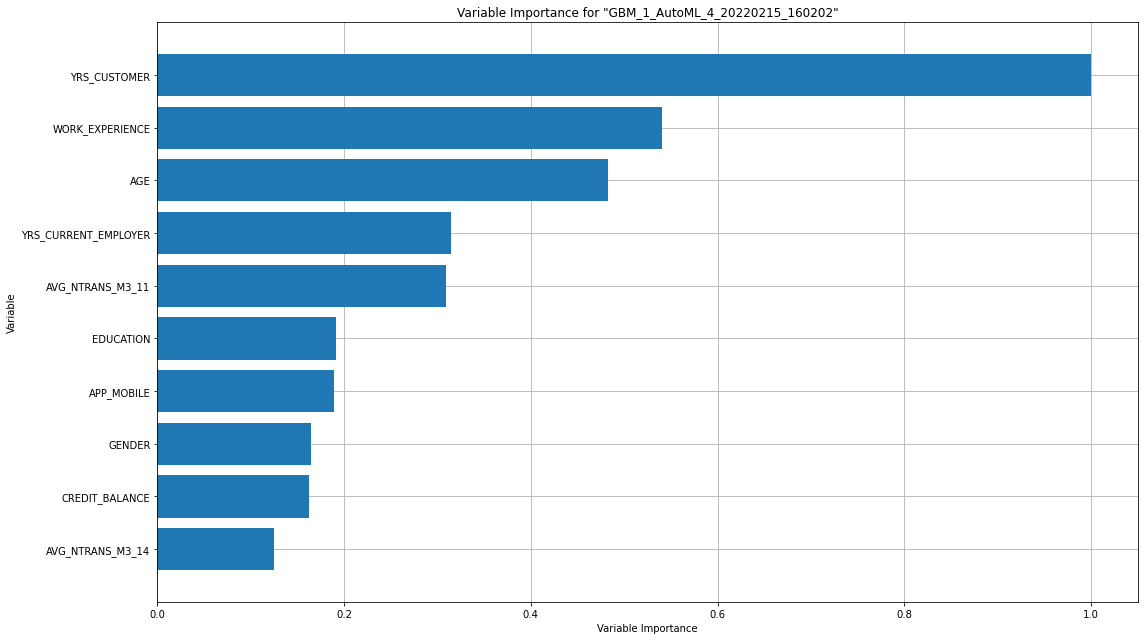

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

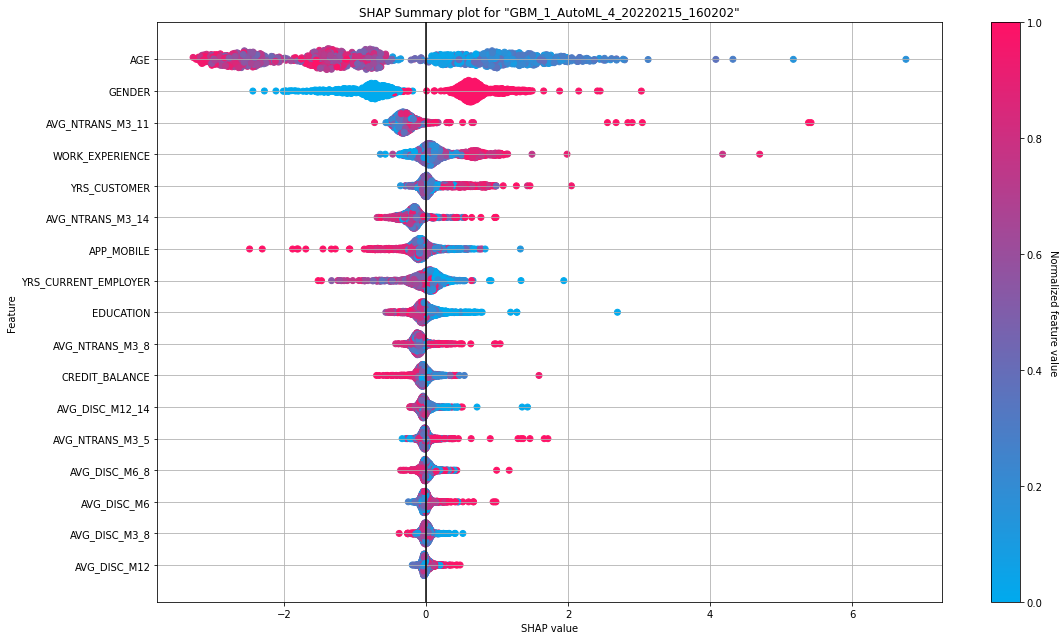

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

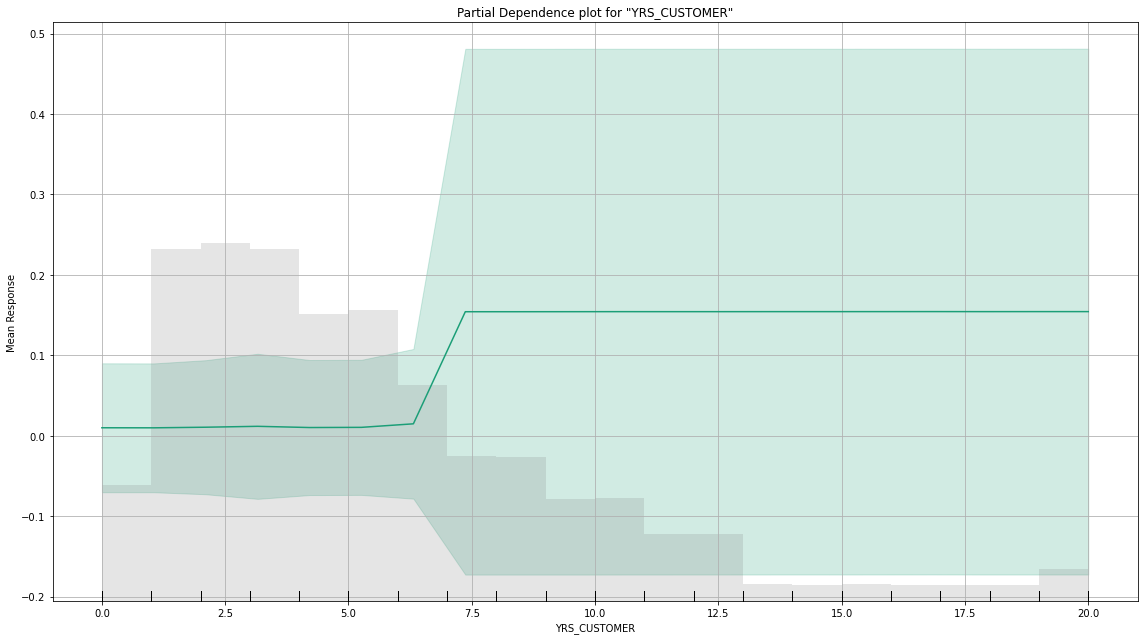

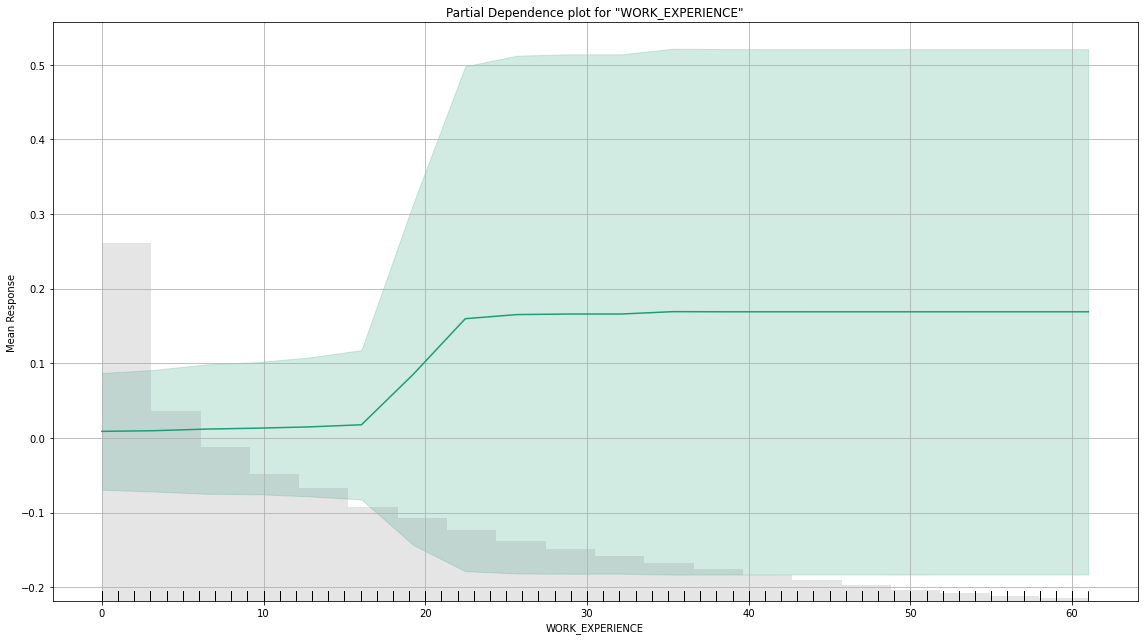

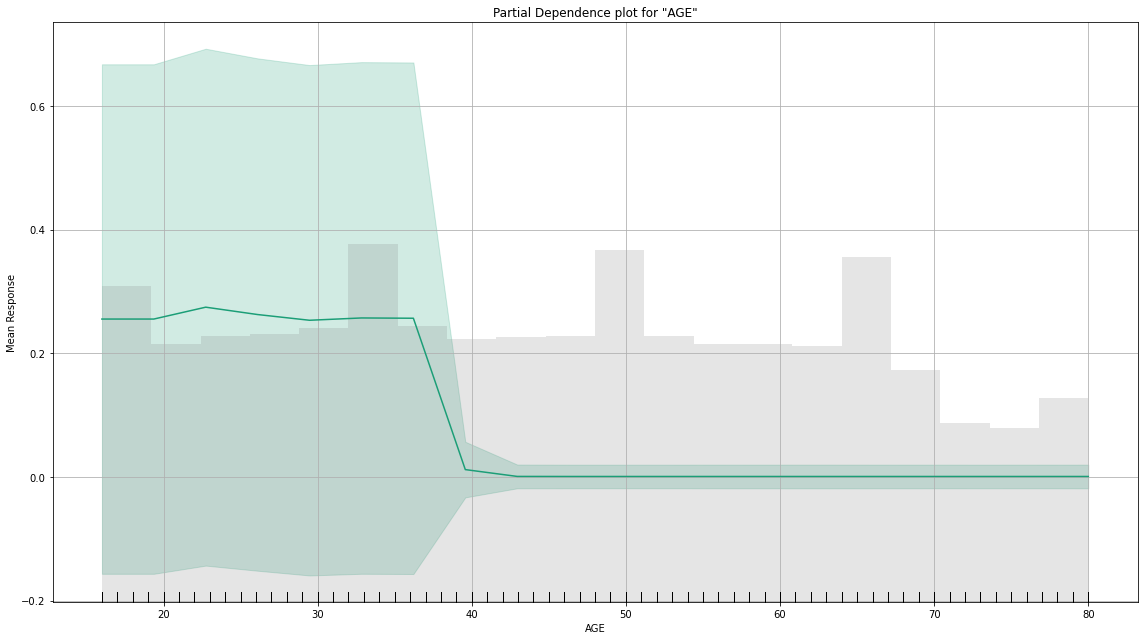

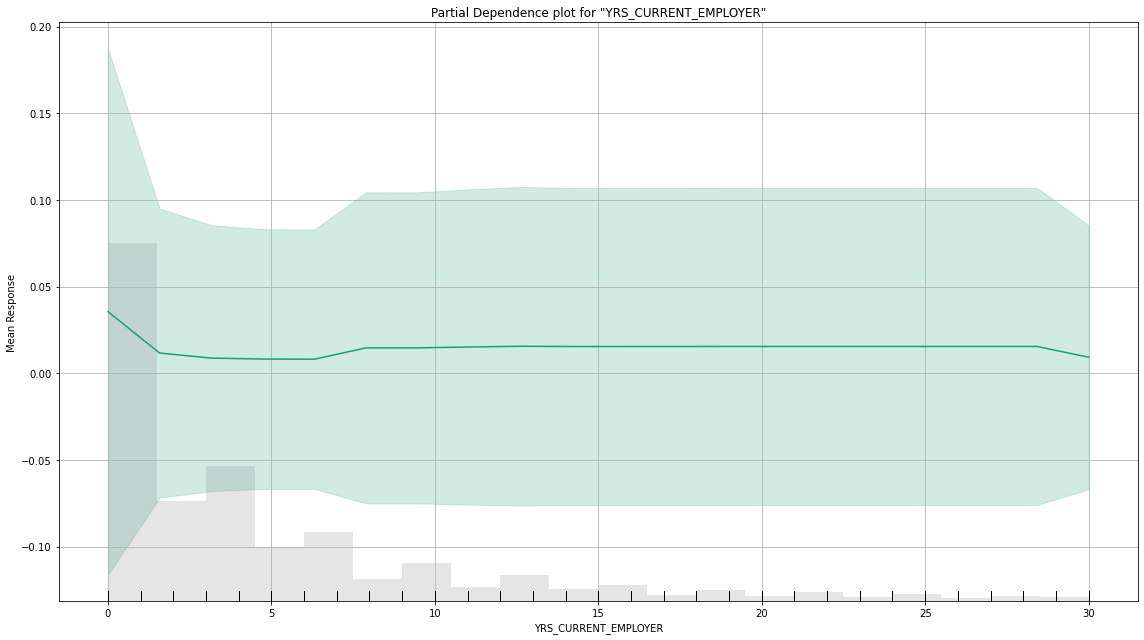

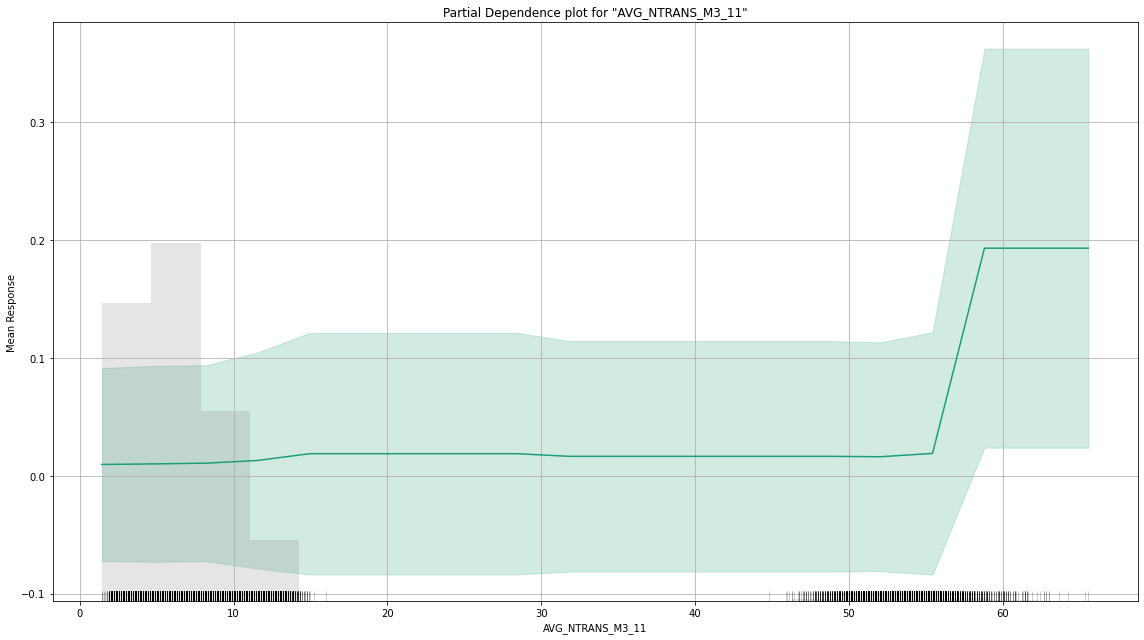

In [57]:
xplain_model = aml.leader.explain(htrain)

In [59]:
pred_h2o = aml.leader.predict(htrain)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [64]:
pred_h2o

predict,p0,p1
0,0.999956,4.36388e-05
0,0.999382,0.000617786
0,0.999962,3.75168e-05
0,0.999969,3.09917e-05
0,0.999862,0.000137749
0,0.999937,6.25904e-05
0,0.999919,8.08784e-05
0,0.999918,8.21962e-05
0,0.999947,5.32839e-05
0,0.999738,0.000261786


In [73]:
pred_pandas=pred_h2o.as_data_frame(use_pandas=True)
print(pred_pandas)
probs = pred_pandas.values

        predict        p0        p1
0             0  0.999956  0.000044
1             0  0.999382  0.000618
2             0  0.999962  0.000038
3             0  0.999969  0.000031
4             0  0.999862  0.000138
...         ...       ...       ...
110411        1  0.095259  0.904741
110412        1  0.249790  0.750210
110413        1  0.194215  0.805785
110414        1  0.098427  0.901573
110415        1  0.084041  0.915959

[110416 rows x 3 columns]


In [76]:
print(probs[0,1])
print(len(probs))

0.9999563611923092
110416


In [78]:
pred_confidence = []
y_pred = []
for i in range(len(probs)):
  y_pred.append(probs[i, 0])
  if (probs[i, 0]==0):
    pred_confidence.append(probs[i, 1])
  else:
    pred_confidence.append(probs[i, 2])
print (pred_confidence)  

[0.9999563611923092, 0.9993822139025551, 0.9999624831921984, 0.9999690083069191, 0.999862250736966, 0.9999374096233212, 0.9999191215715976, 0.9999178038085283, 0.9999467161421935, 0.999738213996021, 0.999887542828891, 0.9991285016986284, 0.9998708159406504, 0.999939533400964, 0.9999439772095872, 0.9999383121735972, 0.9999027880267296, 0.9999229996088318, 0.9998230022952108, 0.99994977813871, 0.999894870189928, 0.9999130174286156, 0.9998465013715564, 0.979929499361934, 0.9982128389950431, 0.9999133919419656, 0.9999563406406836, 0.9988429431719656, 0.9999302507355942, 0.9991165801630824, 0.9632719230001504, 0.9999355376792072, 0.9997970774848236, 0.9999254790032596, 0.9999033761970232, 0.9999469938909415, 0.9999375114258716, 0.999919135031522, 0.9999473452771936, 0.9999307864059368, 0.9999639175013778, 0.9998382318707149, 0.9999271357597754, 0.999342887431806, 0.9999245436171186, 0.9998174537800972, 0.9999302308597772, 0.9998118118114224, 0.9996526163956232, 0.999966158917448, 0.99993907

In [80]:
import pandas as pd
ds_id = pd.DataFrame(ID_train, columns = ["ID"])
ds_actual = pd.DataFrame(y_train, columns = ["ACTUALVALUE"])
ds_pred = pd.DataFrame(y_pred, columns = ["PREDICTEDVALUE"])
ds_prob = pd.DataFrame(pred_confidence, columns = ["PREDICTIONCONFIDENCE"])
dataframe = pd.concat([ds_id, ds_actual, ds_pred, ds_prob], axis=1)
print (dataframe)
dataframe.to_csv('h2o_train_pred.csv',index=False)

               ID  ACTUALVALUE  PREDICTEDVALUE  PREDICTIONCONFIDENCE
0       1138592.0          0.0             0.0              0.999956
1       1157523.0          0.0             0.0              0.999382
2       1040361.0          0.0             0.0              0.999962
3       1249957.0          0.0             0.0              0.999969
4       1370191.0          0.0             0.0              0.999862
...           ...          ...             ...                   ...
110411  1102294.0          1.0             1.0              0.904741
110412  1408047.0          1.0             1.0              0.750210
110413  1158933.0          1.0             1.0              0.805785
110414  1034184.0          1.0             1.0              0.901573
110415  1019359.0          1.0             1.0              0.915959

[110416 rows x 4 columns]


In [81]:
filename = 'MOVIESTREAM_CHURN_RED_TEST.csv'
dataframe = read_csv(filename)
dataframe['YRS_CURRENT_EMPLOYER'] = dataframe['YRS_CURRENT_EMPLOYER'].fillna(0)
dataframe['IS_CHURNER'] = dataframe['IS_CHURNER'].replace(['no'], 0)
dataframe['IS_CHURNER'] = dataframe['IS_CHURNER'].replace(['yes'], 1)
array = dataframe.values
ID_test = array[:,0]
y_test = array[:,-1]
htest = h2o.H2OFrame(dataframe)
htest['IS_CHURNER'] = htest['IS_CHURNER'].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [84]:
model_path = 'D:\ProjectsPython\H2O\h2o_model\GBM_1_AutoML_4_20220215_160202'
saved_model = h2o.load_model(model_path)

In [86]:
pred_h2o = saved_model.predict(htest)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [87]:
pred_pandas=pred_h2o.as_data_frame(use_pandas=True)
print(pred_pandas)
probs = pred_pandas.values

       predict        p0        p1
0            0  0.999962  0.000038
1            0  0.999942  0.000058
2            0  0.999955  0.000045
3            0  0.999940  0.000060
4            0  0.999945  0.000055
...        ...       ...       ...
19164        0  0.988733  0.011267
19165        1  0.219308  0.780692
19166        1  0.079249  0.920751
19167        1  0.241580  0.758420
19168        1  0.304151  0.695849

[19169 rows x 3 columns]


In [88]:
pred_confidence = []
y_pred = []
for i in range(len(probs)):
  y_pred.append(probs[i, 0])
  if (probs[i, 0]==0):
    pred_confidence.append(probs[i, 1])
  else:
    pred_confidence.append(probs[i, 2])
print (pred_confidence)  

[0.999962073710486, 0.9999420919871964, 0.9999546113936224, 0.9999399315989098, 0.9999445828653986, 0.9998533420881568, 0.9999457577998488, 0.9998830567940432, 0.9998878610514359, 0.9999128521842128, 0.9997294306011186, 0.9999534681359752, 0.9999434284604716, 0.9996550878619012, 0.9999516366164332, 0.999822930597148, 0.9999219582945076, 0.9999597827269175, 0.9999634157846916, 0.9958534151251544, 0.9999268178438834, 0.9998565625149962, 0.999910688012018, 0.9999589656013804, 0.9997734295835168, 0.9977732524014842, 0.9999404784938336, 0.9999357549157092, 0.9999220507772784, 0.99968833736635, 0.9999448247269932, 0.9999680699563308, 0.9993522402283608, 0.9999281460572716, 0.9997226959234398, 0.9999680869203218, 0.9999265112485732, 0.9998797612067472, 0.9999157680977214, 0.9999410399385172, 0.9998936637528496, 0.9999623309006176, 0.9999403110176291, 0.9999486627528408, 0.9997501411188788, 0.9997341092629924, 0.9999704014669286, 0.9999282033127832, 0.9998874289921064, 0.9999285870372548, 0.96

In [89]:
import pandas as pd
ds_id = pd.DataFrame(ID_test, columns = ["ID"])
ds_actual = pd.DataFrame(y_test, columns = ["ACTUALVALUE"])
ds_pred = pd.DataFrame(y_pred, columns = ["PREDICTEDVALUE"])
ds_prob = pd.DataFrame(pred_confidence, columns = ["PREDICTIONCONFIDENCE"])
dataframe = pd.concat([ds_id, ds_actual, ds_pred, ds_prob], axis=1)
print (dataframe)
dataframe.to_csv('h2o_test_pred.csv',index=False)

              ID  ACTUALVALUE  PREDICTEDVALUE  PREDICTIONCONFIDENCE
0      1001240.0          0.0             0.0              0.999962
1      1400923.0          0.0             0.0              0.999942
2      1008821.0          0.0             0.0              0.999955
3      1112348.0          0.0             0.0              0.999940
4      1103464.0          0.0             0.0              0.999945
...          ...          ...             ...                   ...
19164  1177914.0          0.0             0.0              0.988733
19165  1360888.0          0.0             1.0              0.780692
19166  1242299.0          1.0             1.0              0.920751
19167  1128962.0          1.0             1.0              0.758420
19168  1128804.0          1.0             1.0              0.695849

[19169 rows x 4 columns]
